In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
print(data.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [6]:
# Categorical features
category_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Numerical features
value_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Binary features
bivariable_features = ['FastingBS', 'HeartDisease']

# Categorizing these features
data_category = data[category_features]
data_value = data[value_features]
data_bivariable = data[bivariable_features]

This part is for Categorical features

In [7]:
from scipy.stats import chi2_contingency
# Choose the columns that I want to analyze.
columns_to_analyze = data[category_features]

# Do the chi-square for every variable
for col in columns_to_analyze:
    # Create a contigency table
    contingency_table = pd.crosstab(data[col], data['HeartDisease'])
    # Chi-square
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col} and HeartDisease:")
    print(f"Chi-square Statistic: {chi2}, p-value: {p}\n")


Chi-square test for Sex and HeartDisease:
Chi-square Statistic: 84.14510134633775, p-value: 4.5976174508091635e-20

Chi-square test for ChestPainType and HeartDisease:
Chi-square Statistic: 268.06723902181767, p-value: 8.08372842808765e-58

Chi-square test for RestingECG and HeartDisease:
Chi-square Statistic: 10.931469339140978, p-value: 0.0042292328167544925

Chi-square test for ExerciseAngina and HeartDisease:
Chi-square Statistic: 222.25938271530583, p-value: 2.907808387659878e-50

Chi-square test for ST_Slope and HeartDisease:
Chi-square Statistic: 355.91844319207905, p-value: 5.167637689470128e-78



In [8]:
# Categorical features
# In this part, we need to keep every columns 
# because they all has a very small p value and large chi-square value.

In [9]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# Choose the columns for One-Hot code
categorical_feature = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
data_encoded = pd.get_dummies(data, columns = categorical_feature)

print("Pre-processed class :")
print(data_encoded)

Pre-processed class :
     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainT

This part is for Numerical features

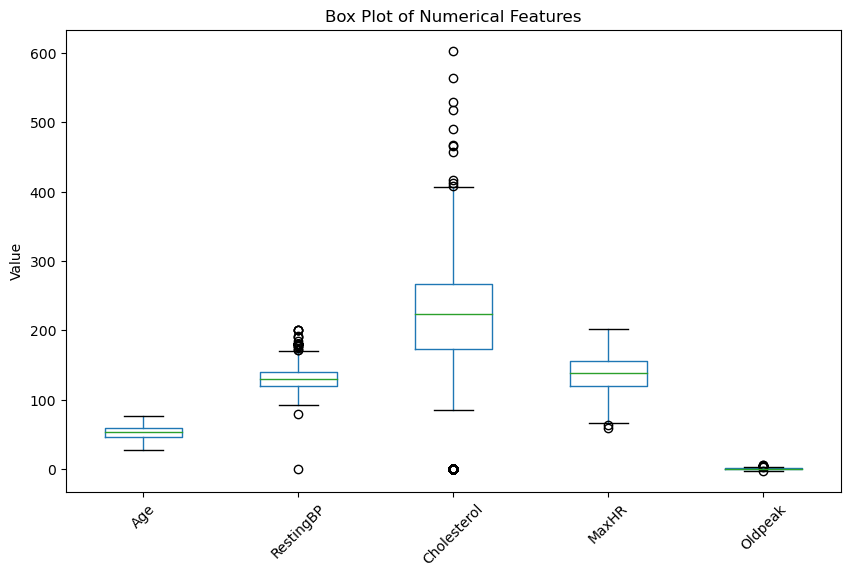

In [10]:
plt.figure(figsize=(10, 6))
data_encoded[value_features].boxplot()
plt.title('Box Plot of Numerical Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

In [11]:
# Calculate IQR
Q1 = data_encoded[value_features].quantile(0.25)
Q3 = data_encoded[value_features].quantile(0.75)
IQR = Q3 - Q1

# Check the outlier
is_outlier = (data_encoded[value_features] < (Q1 - 1.5 * IQR)) | (data_encoded[value_features] > (Q3 + 1.5 * IQR))


In [12]:
# Outliers
is_outlier

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
913,False,False,False,False,False
914,False,False,False,False,False
915,False,False,False,False,False
916,False,False,False,False,False


In [13]:
# Convert outliers into median
for feature in data_value:
    medium_value = data_value[feature].median()
    
    data_encoded[feature] = data_encoded[feature].mask(is_outlier[feature], medium_value)

data_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172.0,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160.0,180.0,0,156.0,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98.0,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138.0,214.0,0,108.0,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150.0,195.0,0,122.0,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132.0,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144.0,193.0,1,141.0,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130.0,131.0,0,115.0,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130.0,236.0,0,174.0,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [14]:
# Assume 'df' is your predefined DataFrame
for column in data_encoded.columns:
    print(column)

Age
RestingBP
Cholesterol
FastingBS
MaxHR
Oldpeak
HeartDisease
Sex_F
Sex_M
ChestPainType_ASY
ChestPainType_ATA
ChestPainType_NAP
ChestPainType_TA
RestingECG_LVH
RestingECG_Normal
RestingECG_ST
ExerciseAngina_N
ExerciseAngina_Y
ST_Slope_Down
ST_Slope_Flat
ST_Slope_Up


In [15]:
# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
dataEncode_rescaled = scaler.fit_transform(data_encoded)
dataEncode_rescaled = pd.DataFrame(data = dataEncode_rescaled, columns = data_encoded.columns)
dataEncode_rescaled.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.615385,0.633540,0.0,0.777778,0.350877,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.871795,0.295031,0.0,0.659259,0.526316,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.487179,0.614907,0.0,0.229630,0.350877,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.589744,0.400621,0.0,0.303704,0.614035,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.743590,0.341615,0.0,0.407407,0.350877,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [16]:
dataEncode_rescaled.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

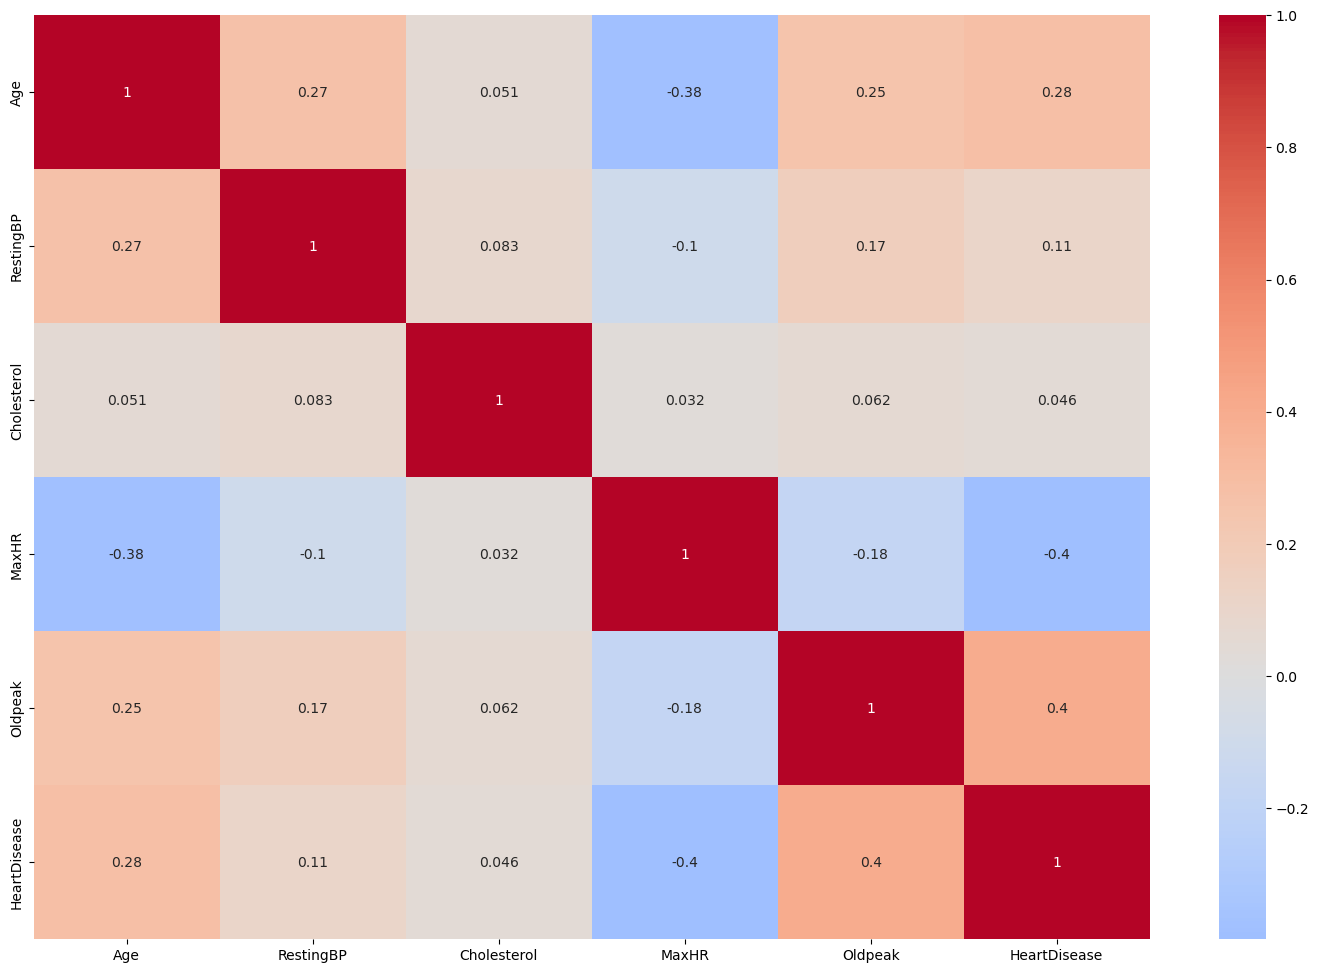

In [17]:
# Calculate the cor matrix for numerical features
corr_data = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
correlation_matrix_numerical_features = dataEncode_rescaled[corr_data].corr()

# Make a correlation heat map
plt.figure(figsize = (18, 12))
sns.heatmap(correlation_matrix_numerical_features, annot= True, cmap = 'coolwarm', center = 0)
plt.show()

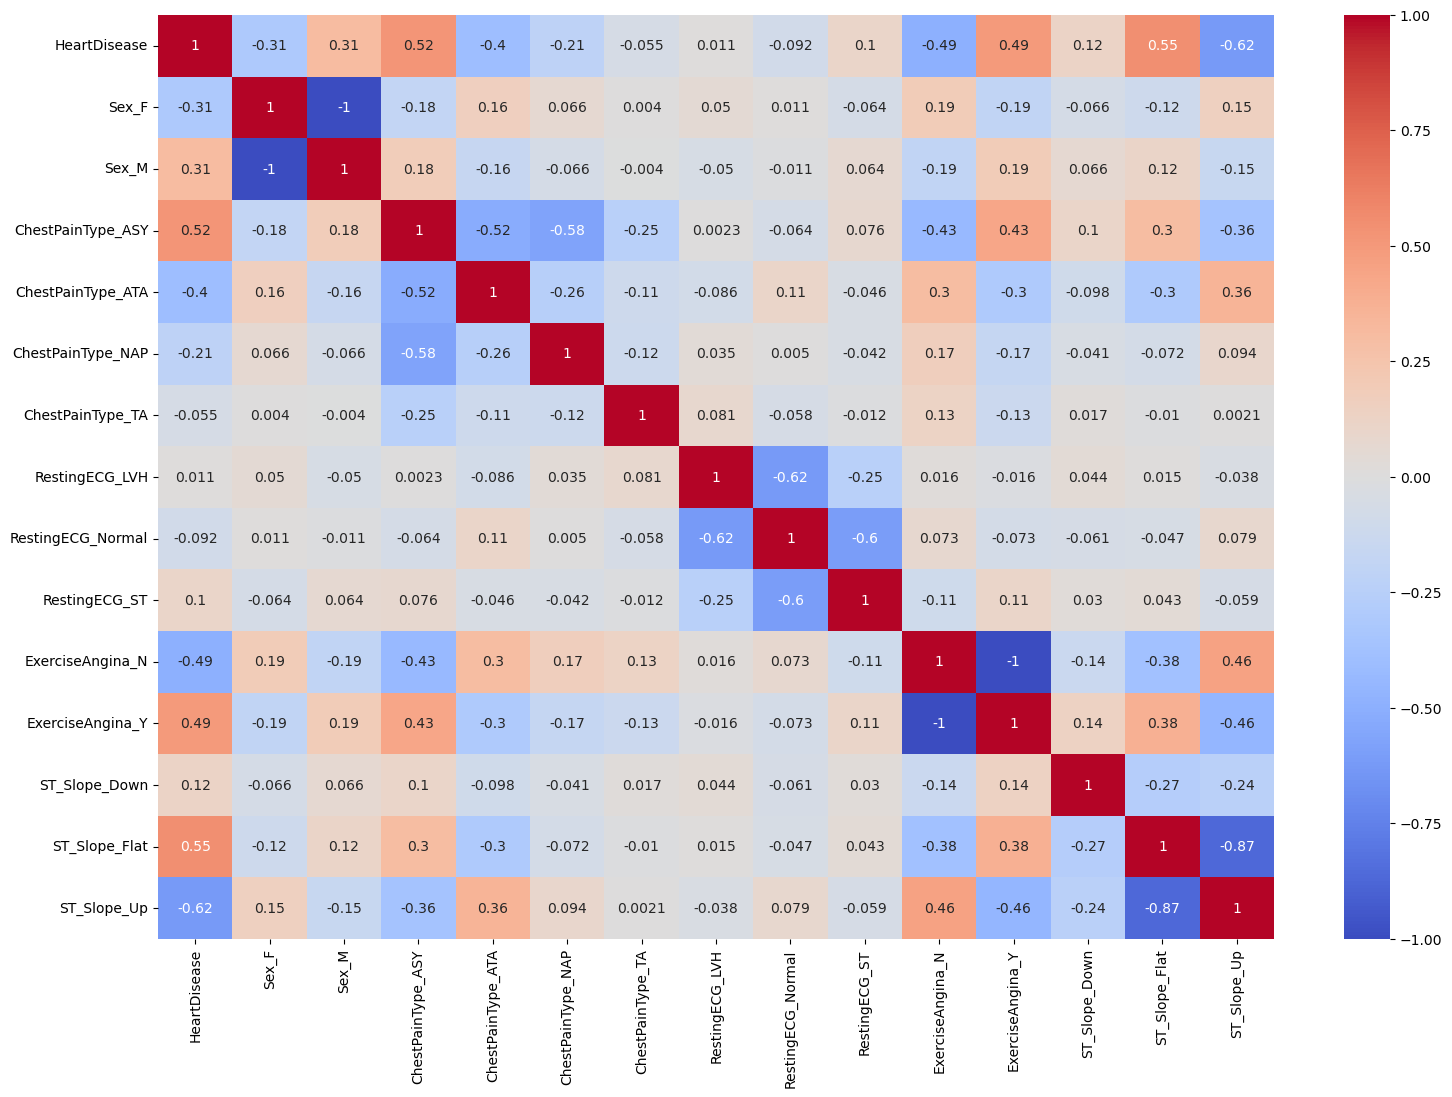

In [18]:
# Calculate the cor matrix for all features
corr_data2 = ['HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up']
correlation_matrix_all_features = dataEncode_rescaled[corr_data2].corr()

# Make a correlation heat map
plt.figure(figsize = (18, 12))
sns.heatmap(correlation_matrix_all_features, annot= True, cmap = 'coolwarm', center = 0)
plt.show()

In [19]:
# Age has a negative correlation with Max Heart Rate. We may keep it.
# Chest pain NAP, it has a strong correlation with Chestpaint ASY

In [20]:
# We find no linear correlation between columns
# Select traits with an association between -0.15 and 0.15 with HeartDisease
low_correlation_features15 = correlation_matrix_all_features.index[
    (correlation_matrix_all_features['HeartDisease'] > -0.15) & (correlation_matrix_all_features['HeartDisease'] < 0.15)
]
# Select traits with an association between -0.25 and 0.25 with HeartDisease
low_correlation_features25 = correlation_matrix_all_features.index[
    (correlation_matrix_all_features['HeartDisease'] > -0.25) & (correlation_matrix_all_features['HeartDisease'] < 0.25)
]
# Select traits with an association between -0.35 and 0.35 with HeartDisease
low_correlation_features35 = correlation_matrix_all_features.index[
    (correlation_matrix_all_features['HeartDisease'] > -0.35) & (correlation_matrix_all_features['HeartDisease'] < 0.35)
]

dataEncode_rescaled_reduced15 = dataEncode_rescaled.drop(columns=low_correlation_features15)
dataEncode_rescaled_reduced25 = dataEncode_rescaled.drop(columns=low_correlation_features25)
dataEncode_rescaled_reduced35 = dataEncode_rescaled.drop(columns=low_correlation_features35)



In [21]:
processed_data = dataEncode_rescaled_reduced25

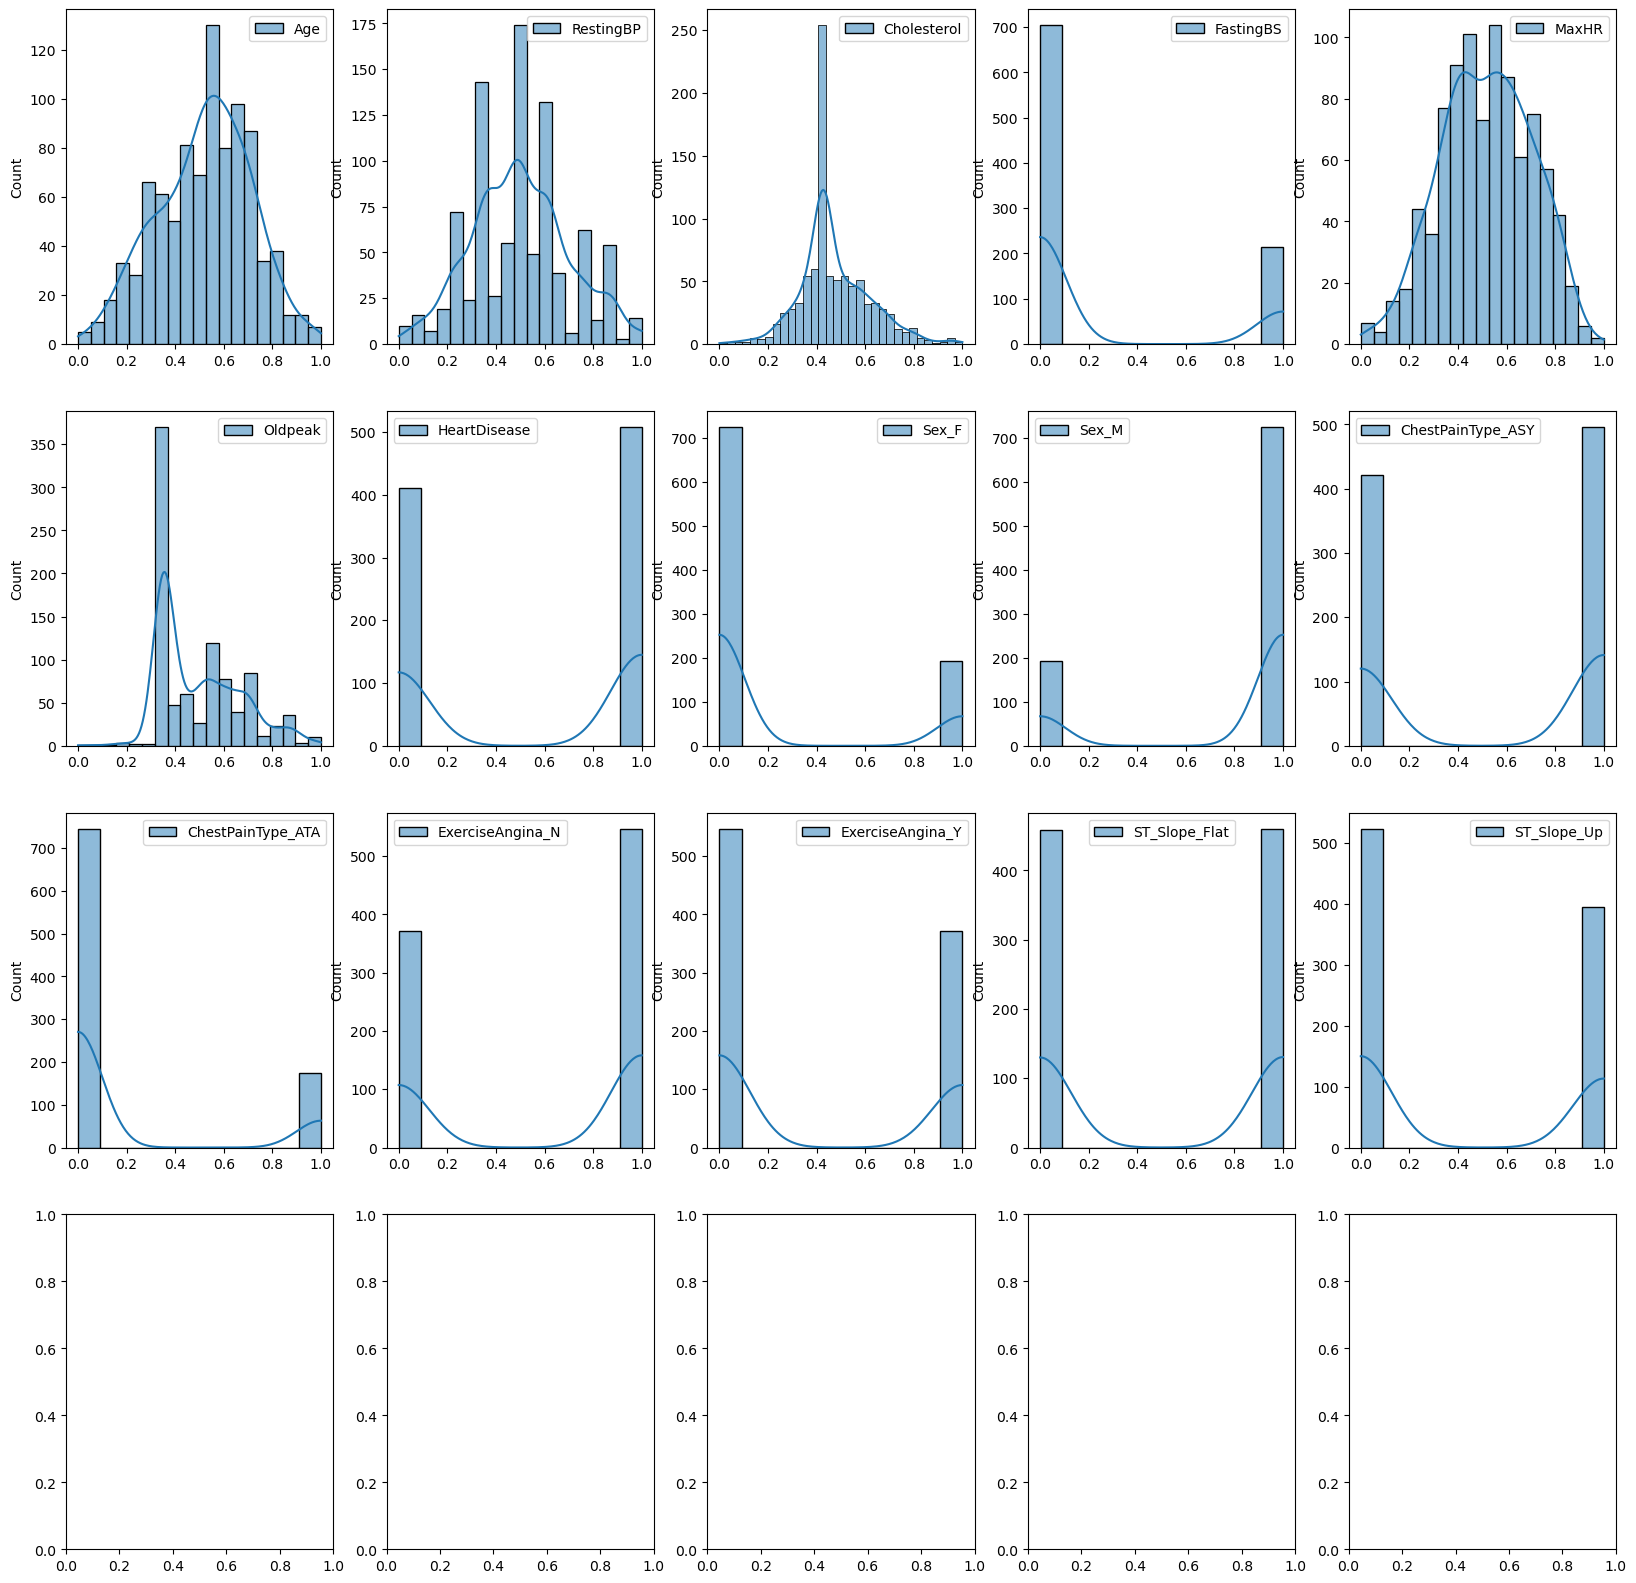

In [22]:
# Distribution Plot
fig, axes = plt.subplots(4,5, figsize=(20,20))
axes = axes.flatten()

# Loop to create subplots
i = 0
for item in processed_data.items():
    sns.histplot(item, kde=True, ax=axes[i])
    i+=1

plt.show()

In [23]:
# Analysis of distribution plots
# The ratio for female to male is 2:7.
# Distribution plot for 'Oldpeak' has a really high peak.
# ChestPainType_ASY (asymptomatic): Half of the people have no symptoms.
# ChestPainType_ATA (atypical angina): Only about 2/7 people experienced ATA chest pain.
# ChestPainType_NAP (non-anginal): Only about 2/7 people experienced NAP chest pain.
# ChestPainType_TA (typical angina): Very little people experienced TA chest pain.

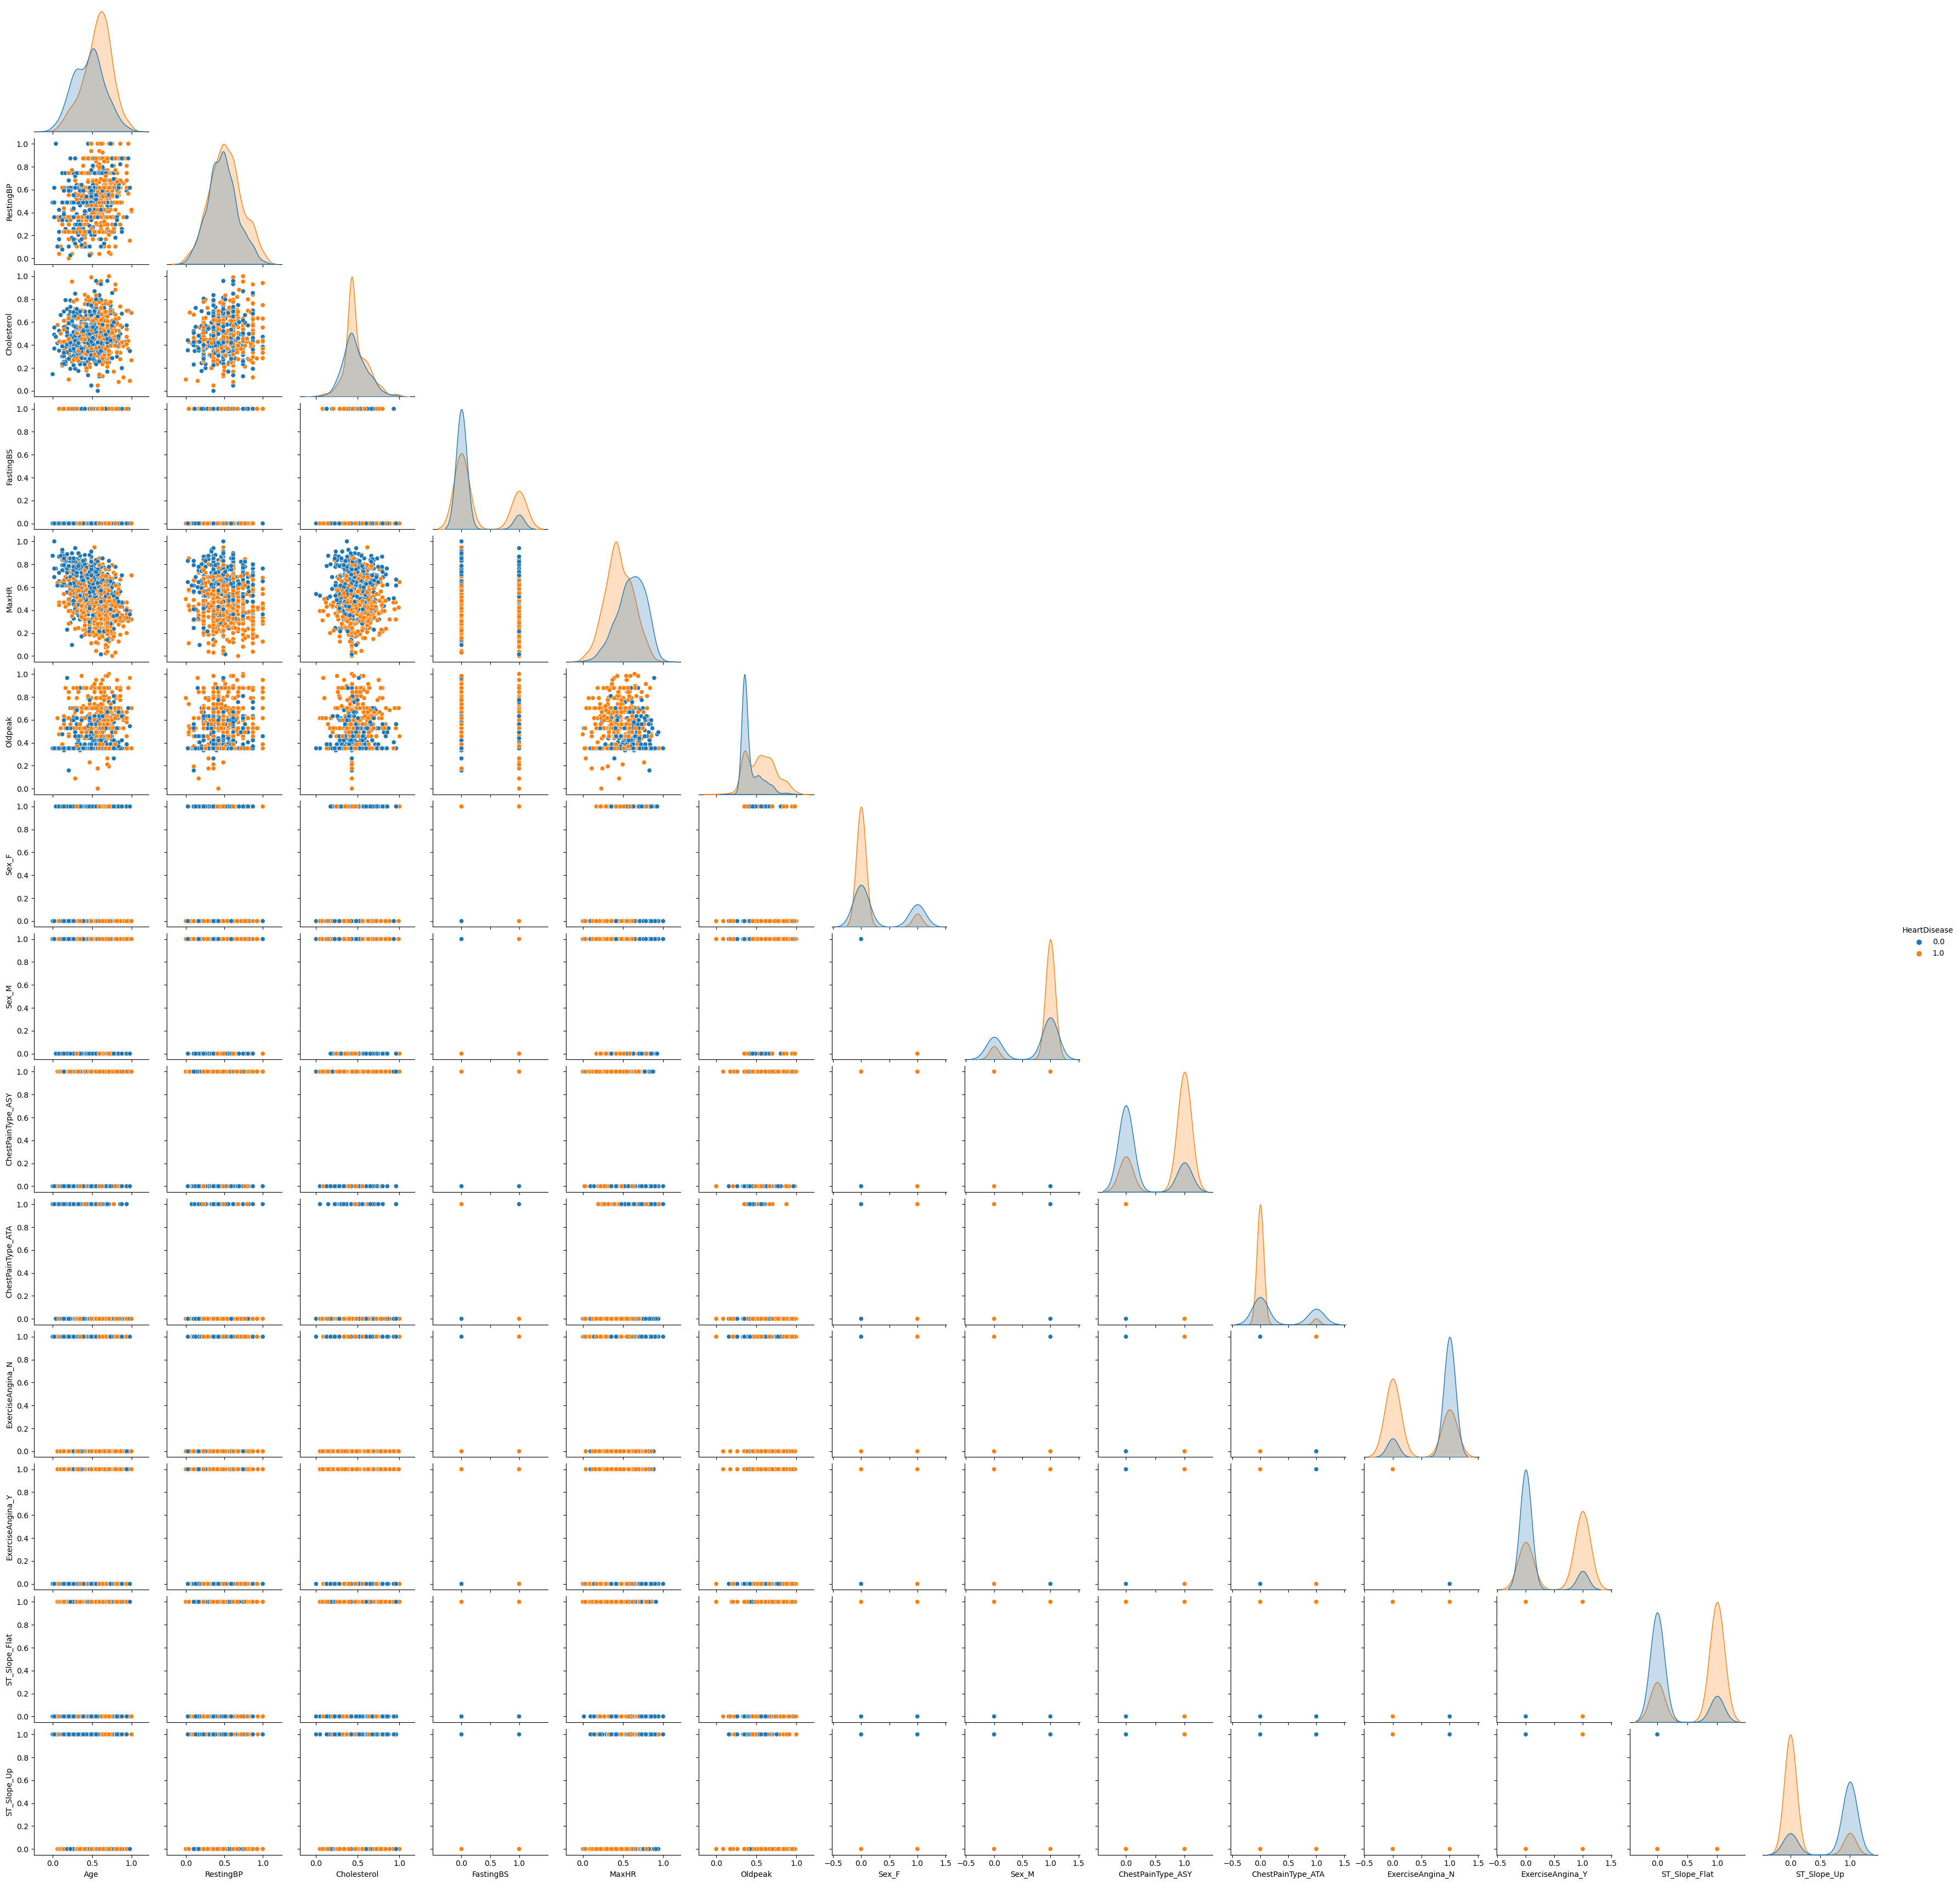

In [24]:
# Pair plot
sns.pairplot(data=processed_data, hue="HeartDisease", corner=True) 
plt.show()

In [25]:
# There is no linear relationship between any 2 features.

In [26]:
processed_data15 = dataEncode_rescaled_reduced15.drop(['Sex_F', 'ExerciseAngina_N'], axis=1)
processed_data25 = dataEncode_rescaled_reduced25.drop(['Sex_F', 'ExerciseAngina_N'], axis=1)
processed_data35 = dataEncode_rescaled_reduced35.drop(['ExerciseAngina_N'], axis=1)

Training Classification Report for Categories above correlation threshold of 0.15:
               precision    recall  f1-score   support

         0.0       0.87      0.84      0.85       334
         1.0       0.87      0.90      0.88       400

    accuracy                           0.87       734
   macro avg       0.87      0.87      0.87       734
weighted avg       0.87      0.87      0.87       734

Testing Classification Report for Categories above correlation threshold of 0.15:
               precision    recall  f1-score   support

         0.0       0.83      0.82      0.82        76
         1.0       0.87      0.88      0.88       108

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



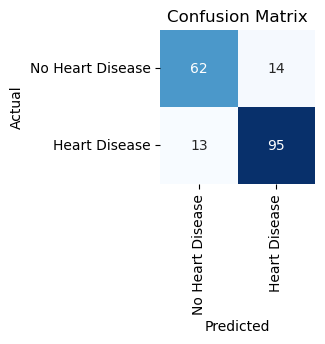

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix

train, test = train_test_split(processed_data15, test_size=0.2, random_state=21)

X_train, y_train = train.drop(columns=['HeartDisease']) ,train['HeartDisease']
X_test, y_test = test.drop(columns=['HeartDisease']), test['HeartDisease']
cls = LogisticRegression()
cls.fit(X_train, y_train)

predicted_train = cls.predict(X_train)
predicted_test = cls.predict(X_test)

print("Training Classification Report for Categories above correlation threshold of 0.15:\n " + classification_report(y_train, predicted_train))

print("Testing Classification Report for Categories above correlation threshold of 0.15:\n " + classification_report(y_test, predicted_test))

cm = confusion_matrix(y_test, predicted_test)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from sklearn.model_selection import cross_validate

CV = cross_validate(cls, processed_data15.drop('HeartDisease', axis = 1), processed_data15['HeartDisease'], cv=10, scoring=['accuracy'])
print('Accuracy')
print(CV['test_accuracy'])

print('Average Accuracy = ', sum(CV['test_accuracy']) / len(CV['test_accuracy']))

Accuracy
[0.84782609 0.94565217 0.79347826 0.90217391 0.88043478 0.84782609
 0.86956522 0.84782609 0.73626374 0.78021978]
Average Accuracy =  0.8451266125179169


Training Classification Report for Categories above correlation threshold of 0.25:
               precision    recall  f1-score   support

         0.0       0.87      0.84      0.85       334
         1.0       0.87      0.90      0.88       400

    accuracy                           0.87       734
   macro avg       0.87      0.87      0.87       734
weighted avg       0.87      0.87      0.87       734

Testing Classification Report for Categories above correlation threshold of 0.25:
               precision    recall  f1-score   support

         0.0       0.83      0.82      0.82        76
         1.0       0.87      0.88      0.88       108

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



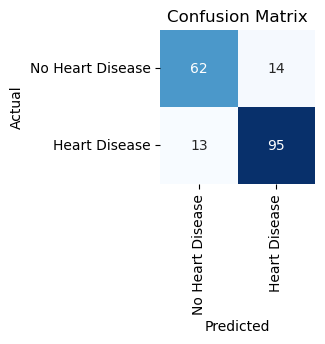

In [29]:
train, test = train_test_split(processed_data25, test_size=0.2, random_state=21)

X_train, y_train = train.drop(columns=['HeartDisease']) ,train['HeartDisease']
X_test, y_test = test.drop(columns=['HeartDisease']), test['HeartDisease']
cls = LogisticRegression()
cls.fit(X_train, y_train)

predicted_train = cls.predict(X_train)
predicted_test = cls.predict(X_test)

print("Training Classification Report for Categories above correlation threshold of 0.25:\n " + classification_report(y_train, predicted_train))

print("Testing Classification Report for Categories above correlation threshold of 0.25:\n " + classification_report(y_test, predicted_test))

cm = confusion_matrix(y_test, predicted_test)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
CV = cross_validate(cls, processed_data25.drop('HeartDisease', axis = 1), processed_data25['HeartDisease'], cv=10, scoring=['accuracy'])
print('Accuracy')
print(CV['test_accuracy'])

print('Average Accuracy = ', sum(CV['test_accuracy']) / len(CV['test_accuracy']))

Accuracy
[0.84782609 0.94565217 0.79347826 0.89130435 0.88043478 0.84782609
 0.88043478 0.84782609 0.73626374 0.78021978]
Average Accuracy =  0.8451266125179169


Training Classification Report for Categories above correlation threshold of 0.35:
               precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       334
         1.0       0.86      0.89      0.87       400

    accuracy                           0.86       734
   macro avg       0.86      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734

Testing Classification Report for Categories above correlation threshold of 0.35:
               precision    recall  f1-score   support

         0.0       0.81      0.78      0.79        76
         1.0       0.85      0.87      0.86       108

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184



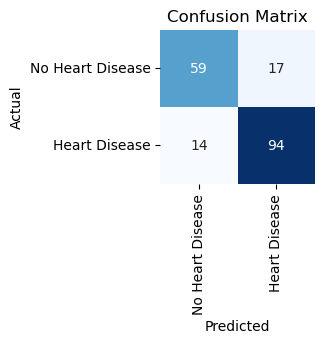

In [31]:
train, test = train_test_split(processed_data35, test_size=0.2, random_state=21)

X_train, y_train = train.drop(columns=['HeartDisease']) ,train['HeartDisease']
X_test, y_test = test.drop(columns=['HeartDisease']), test['HeartDisease']
cls = LogisticRegression()
cls.fit(X_train, y_train)

predicted_train = cls.predict(X_train)
predicted_test = cls.predict(X_test)

print("Training Classification Report for Categories above correlation threshold of 0.35:\n " + classification_report(y_train, predicted_train))

print("Testing Classification Report for Categories above correlation threshold of 0.35:\n " + classification_report(y_test, predicted_test))

cm = confusion_matrix(y_test, predicted_test)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
CV = cross_validate(cls, processed_data35.drop('HeartDisease', axis = 1), processed_data35['HeartDisease'], cv=10, scoring=['accuracy'])
print('Accuracy')
print(CV['test_accuracy'])

print('Average Accuracy = ', sum(CV['test_accuracy']) / len(CV['test_accuracy']))

Accuracy
[0.88043478 0.93478261 0.81521739 0.86956522 0.85869565 0.82608696
 0.85869565 0.81521739 0.68131868 0.78021978]
Average Accuracy =  0.8320234113712376


Training Classification Report for Categories above correlation threshold of 0.15:
               precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       334
         1.0       0.86      0.92      0.89       400

    accuracy                           0.88       734
   macro avg       0.88      0.87      0.88       734
weighted avg       0.88      0.88      0.88       734

Testing classification Report for Categories above correlation threshold of 0.15:
               precision    recall  f1-score   support

         0.0       0.90      0.83      0.86        76
         1.0       0.89      0.94      0.91       108

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.89       184
weighted avg       0.89      0.89      0.89       184



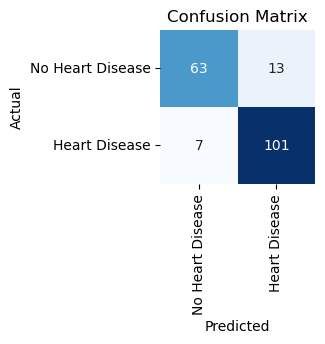

In [33]:
from sklearn import svm
from sklearn import metrics

train, test = train_test_split(processed_data15, test_size=0.2, random_state=21)
X_train, y_train = train.drop(columns=['HeartDisease']) ,train['HeartDisease']
X_test, y_test = test.drop(columns=['HeartDisease']), test['HeartDisease']

clf = svm.SVC(kernel="rbf")

clf.fit(X_train, y_train)

predicted_train = clf.predict(X_train)
predicted = clf.predict(X_test)

print("Training Classification Report for Categories above correlation threshold of 0.15:\n " + classification_report(y_train, predicted_train))

print("Testing classification Report for Categories above correlation threshold of 0.15:\n " + classification_report(y_test, predicted))

cm = confusion_matrix(y_test, predicted)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
CV = cross_validate(clf, processed_data15.drop('HeartDisease', axis = 1), processed_data15['HeartDisease'], cv=10, scoring=['accuracy'])
print('Accuracy')
print(CV['test_accuracy'])

print('Average Accuracy = ', sum(CV['test_accuracy']) / len(CV['test_accuracy']))

Accuracy
[0.90217391 0.95652174 0.77173913 0.92391304 0.86956522 0.79347826
 0.86956522 0.79347826 0.73626374 0.75824176]
Average Accuracy =  0.8374940277114191


Training Classification Report for Categories above correlation threshold of 0.25:
               precision    recall  f1-score   support

         0.0       0.89      0.82      0.85       334
         1.0       0.86      0.92      0.89       400

    accuracy                           0.87       734
   macro avg       0.87      0.87      0.87       734
weighted avg       0.87      0.87      0.87       734

Testing Classification Report for Categories above correlation threshold of 0.25:
               precision    recall  f1-score   support

         0.0       0.90      0.83      0.86        76
         1.0       0.89      0.94      0.91       108

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.89       184
weighted avg       0.89      0.89      0.89       184



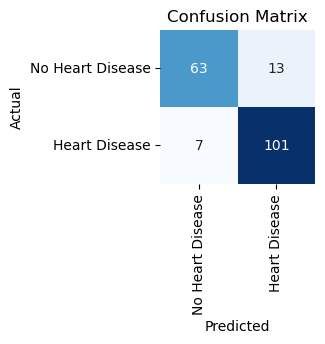

In [35]:
train, test = train_test_split(processed_data25, test_size=0.2, random_state=21)
X_train, y_train = train.drop(columns=['HeartDisease']) ,train['HeartDisease']
X_test, y_test = test.drop(columns=['HeartDisease']), test['HeartDisease']

clf = svm.SVC(kernel="rbf")

clf.fit(X_train, y_train)

predicted_train = clf.predict(X_train)
predicted = clf.predict(X_test)

print("Training Classification Report for Categories above correlation threshold of 0.25:\n " + classification_report(y_train, predicted_train))

print("Testing Classification Report for Categories above correlation threshold of 0.25:\n " + classification_report(y_test, predicted))

cm = confusion_matrix(y_test, predicted)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
CV = cross_validate(clf, processed_data25.drop('HeartDisease', axis = 1), processed_data25['HeartDisease'], cv=10, scoring=['accuracy'])
print('Accuracy')
print(CV['test_accuracy'])

print('Average Accuracy = ', sum(CV['test_accuracy']) / len(CV['test_accuracy']))

Accuracy
[0.90217391 0.95652174 0.77173913 0.92391304 0.86956522 0.80434783
 0.86956522 0.80434783 0.74725275 0.76923077]
Average Accuracy =  0.8418657429526994


Training Classification Report for Categories above correlation threshold of 0.35:
               precision    recall  f1-score   support

         0.0       0.89      0.81      0.85       334
         1.0       0.85      0.92      0.88       400

    accuracy                           0.87       734
   macro avg       0.87      0.86      0.86       734
weighted avg       0.87      0.87      0.87       734

Classification Report for Categories above correlation threshold of 0.35:
               precision    recall  f1-score   support

         0.0       0.85      0.76      0.81        76
         1.0       0.84      0.91      0.88       108

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



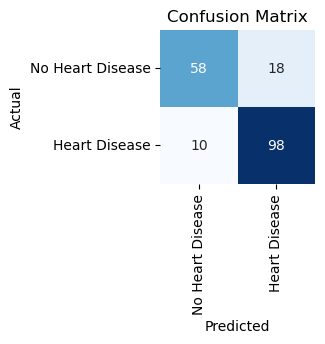

In [37]:
train, test = train_test_split(processed_data35, test_size=0.2, random_state=21)
X_train, y_train = train.drop(columns=['HeartDisease']) ,train['HeartDisease']
X_test, y_test = test.drop(columns=['HeartDisease']), test['HeartDisease']

clf = svm.SVC(kernel="rbf")

clf.fit(X_train, y_train)

predicted_train = clf.predict(X_train)
predicted = clf.predict(X_test)

print("Training Classification Report for Categories above correlation threshold of 0.35:\n " + classification_report(y_train, predicted_train))

print("Classification Report for Categories above correlation threshold of 0.35:\n " + classification_report(y_test, predicted))

cm = confusion_matrix(y_test, predicted)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
CV = cross_validate(clf, processed_data35.drop('HeartDisease', axis = 1), processed_data35['HeartDisease'], cv=10, scoring=['accuracy'])
print('Accuracy')
print(CV['test_accuracy'])

print('Average Accuracy = ', sum(CV['test_accuracy']) / len(CV['test_accuracy']))

Accuracy
[0.88043478 0.94565217 0.7826087  0.90217391 0.85869565 0.81521739
 0.84782609 0.73913043 0.71428571 0.76923077]
Average Accuracy =  0.8255255613951267


# ANN Model

In [39]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (7, 7), max_iter = 500)


## Model 15

### hyperparameter tuning

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

max_iterations = [500,800,1000]
hidden_layer_siz = [(5), (7), (9), (5, 5), (7, 7), (9, 9), (5, 7, 5), (7, 9, 7), (9, 11, 9)]
learning_rates = 0.15 * np.arange(1, 4)

param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations)

grid = GridSearchCV(estimator = mlp, param_grid = param_grid, scoring = 'accuracy')

grid.fit(processed_data15.drop('HeartDisease', axis = 1), processed_data15['HeartDisease'])

c:\Users\manyu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPClassifier(activation='logistic', batch_size=100,
                                     hidden_layer_sizes=(7, 7),
                                     learning_rate_init=0.3, max_iter=500,
                                     random_state=42, solver='sgd'),
             param_grid={'hidden_layer_sizes': [5, 7, 9, (5, 5), (7, 7), (9, 9),
                                                (5, 7, 5), (7, 9, 7),
                                                (9, 11, 9)],
                         'learning_rate_init': array([0.15, 0.3 , 0.45]),
                         'max_iter': [500, 800, 1000]},
             scoring='accuracy')

In [41]:
print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Accuracy : ", grid.best_score_)

Optimal Hyper-parameters :  {'hidden_layer_sizes': (7, 7), 'learning_rate_init': 0.44999999999999996, 'max_iter': 500}
Optimal Accuracy :  0.8452542171537182


### Best model15 fit

****************************************************************************************************
          Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  Sex_M  \
4    0.530612   0.743590     0.341615        0.0  0.407407  0.350877    1.0   
234  0.530612   0.615385     0.695652        0.0  0.540741  0.350877    0.0   
872  0.551020   0.512821     0.832298        0.0  0.481481  0.561404    1.0   
61   0.306122   0.743590     0.524845        0.0  0.800000  0.350877    0.0   
166  0.448980   0.615385     0.453416        0.0  0.540741  0.456140    1.0   
..        ...        ...          ...        ...       ...       ...    ...   
368  0.591837   0.615385     0.428571        0.0  0.392593  0.701754    1.0   
48   0.163265   0.256410     0.791925        0.0  0.866667  0.526316    1.0   
772  0.346939   0.461538     0.692547        0.0  0.762963  0.350877    1.0   
824  0.183673   0.487179     0.512422        0.0  0.888889  0.964912    1.0   
207  0.142857   0.230769     0

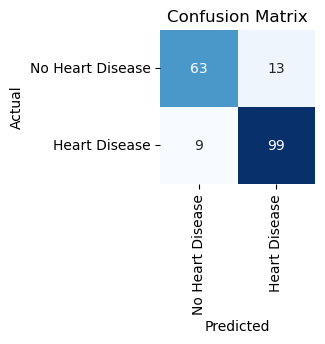

In [42]:
# Use optimal hyperparameters to train the model15
best_model15 = grid.best_estimator_

train, test = train_test_split(processed_data15, test_size=0.2, random_state=21)
X_train, y_train = train.drop(columns=['HeartDisease']) ,train['HeartDisease']
X_test, y_test = test.drop(columns=['HeartDisease']), test['HeartDisease']

best_model15.fit(X_train, y_train)


print("*" * 100)
print(X_train)
print("*" * 100)

predicted_train = best_model15.predict(X_train)
predicted = best_model15.predict(X_test)

print("Training Classification Report for Categories above correlation threshold of 0.15:\n " + classification_report(y_train, predicted_train))

print("Testing Classification Report for Categories above correlation threshold of 0.15:\n " + classification_report(y_test, predicted))

cm = confusion_matrix(y_test, predicted)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [43]:
CV = cross_validate(best_model15, processed_data15.drop('HeartDisease', axis = 1), processed_data15['HeartDisease'], cv=10, scoring=['accuracy'])
print('Accuracy')
print(CV['test_accuracy'])

print('Average Accuracy = ', sum(CV['test_accuracy']) / len(CV['test_accuracy']))

Accuracy
[0.85869565 0.93478261 0.83695652 0.90217391 0.88043478 0.82608696
 0.86956522 0.84782609 0.76923077 0.8021978 ]
Average Accuracy =  0.8527950310559007


## Model 25

### hyperparameter tuning

In [44]:
grid.fit(processed_data25.drop('HeartDisease', axis = 1), processed_data25['HeartDisease'])
print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Accuracy : ", grid.best_score_)

c:\Users\manyu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Optimal Hyper-parameters :  {'hidden_layer_sizes': (5, 5), 'learning_rate_init': 0.3, 'max_iter': 500}
Optimal Accuracy :  0.843056545497743


### Best model25 fit

****************************************************************************************************
          Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  Sex_M  \
4    0.530612   0.743590     0.341615        0.0  0.407407  0.350877    1.0   
234  0.530612   0.615385     0.695652        0.0  0.540741  0.350877    0.0   
872  0.551020   0.512821     0.832298        0.0  0.481481  0.561404    1.0   
61   0.306122   0.743590     0.524845        0.0  0.800000  0.350877    0.0   
166  0.448980   0.615385     0.453416        0.0  0.540741  0.456140    1.0   
..        ...        ...          ...        ...       ...       ...    ...   
368  0.591837   0.615385     0.428571        0.0  0.392593  0.701754    1.0   
48   0.163265   0.256410     0.791925        0.0  0.866667  0.526316    1.0   
772  0.346939   0.461538     0.692547        0.0  0.762963  0.350877    1.0   
824  0.183673   0.487179     0.512422        0.0  0.888889  0.964912    1.0   
207  0.142857   0.230769     0

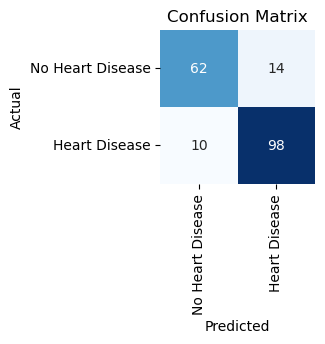

In [45]:
# Use optimal hyperparameters to train the model25
best_model25 = grid.best_estimator_
best_model25.fit(processed_data25.drop('HeartDisease', axis = 1), processed_data15['HeartDisease'])

train, test = train_test_split(processed_data25, test_size=0.2, random_state=21)
X_train, y_train = train.drop(columns=['HeartDisease']) ,train['HeartDisease']
X_test, y_test = test.drop(columns=['HeartDisease']), test['HeartDisease']

best_model25.fit(X_train, y_train)

print("*" * 100)
print(X_train)
print("*" * 100)

predicted_train = best_model25.predict(X_train)
predicted = best_model25.predict(X_test)

print("Training Classification Report for Categories above correlation threshold of 0.25:\n " + classification_report(y_train, predicted_train))

print("Testing Classification Report for Categories above correlation threshold of 0.25:\n " + classification_report(y_test, predicted))

cm = confusion_matrix(y_test, predicted)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [46]:
CV = cross_validate(best_model25, processed_data25.drop('HeartDisease', axis = 1), processed_data25['HeartDisease'], cv=10, scoring=['accuracy'])
print('Accuracy')
print(CV['test_accuracy'])

print('Average Accuracy = ', sum(CV['test_accuracy']) / len(CV['test_accuracy']))

Accuracy
[0.90217391 0.94565217 0.7826087  0.93478261 0.88043478 0.83695652
 0.90217391 0.7826087  0.72527473 0.8021978 ]
Average Accuracy =  0.8494863831820355


## Model 35

### hyperparameter tuning

In [47]:
grid.fit(processed_data35.drop('HeartDisease', axis = 1), processed_data35['HeartDisease'])
print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Accuracy : ", grid.best_score_)

Optimal Hyper-parameters :  {'hidden_layer_sizes': (9, 9), 'learning_rate_init': 0.44999999999999996, 'max_iter': 500}
Optimal Accuracy :  0.8365169874079352


### Best model 35 fit

****************************************************************************************************
          Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
4    0.530612   0.743590     0.341615        0.0  0.407407  0.350877   
234  0.530612   0.615385     0.695652        0.0  0.540741  0.350877   
872  0.551020   0.512821     0.832298        0.0  0.481481  0.561404   
61   0.306122   0.743590     0.524845        0.0  0.800000  0.350877   
166  0.448980   0.615385     0.453416        0.0  0.540741  0.456140   
..        ...        ...          ...        ...       ...       ...   
368  0.591837   0.615385     0.428571        0.0  0.392593  0.701754   
48   0.163265   0.256410     0.791925        0.0  0.866667  0.526316   
772  0.346939   0.461538     0.692547        0.0  0.762963  0.350877   
824  0.183673   0.487179     0.512422        0.0  0.888889  0.964912   
207  0.142857   0.230769     0.534161        0.0  0.540741  0.350877   

     ChestPainType_ASY  ChestPainT

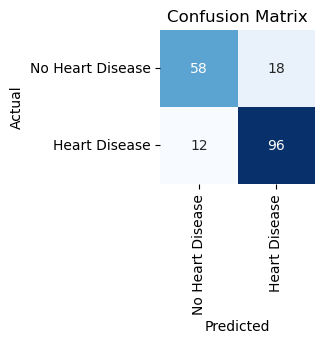

In [48]:
# Use optimal hyperparameters to train the model35
best_model35 = grid.best_estimator_
best_model35.fit(processed_data35.drop('HeartDisease', axis = 1), processed_data35['HeartDisease'])

train, test = train_test_split(processed_data35, test_size=0.2, random_state=21)
X_train, y_train = train.drop(columns=['HeartDisease']) ,train['HeartDisease']
X_test, y_test = test.drop(columns=['HeartDisease']), test['HeartDisease']


best_model35.fit(X_train, y_train)

print("*" * 100)
print(X_train)
print("*" * 100)

predicted_train = best_model35.predict(X_train)
predicted = best_model35.predict(X_test)

print("Training Classification Report for Categories above correlation threshold of 0.15:\n " + classification_report(y_train, predicted_train))

print("Testing Classification Report for Categories above correlation threshold of 0.15:\n " + classification_report(y_test, predicted))

cm = confusion_matrix(y_test, predicted)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
CV = cross_validate(best_model35, processed_data35.drop('HeartDisease', axis = 1), processed_data35['HeartDisease'], cv=10, scoring=['accuracy'])
print('Accuracy')
print(CV['test_accuracy'])

print('Average Accuracy = ', sum(CV['test_accuracy']) / len(CV['test_accuracy']))

Accuracy
[0.81521739 0.91304348 0.80434783 0.85869565 0.86956522 0.83695652
 0.86956522 0.7826087  0.72527473 0.74725275]
Average Accuracy =  0.8222527472527474


In [50]:
import joblib
joblib.dump(best_model15, 'model15.pkl')

['model15.pkl']

In [51]:
joblib.dump(best_model25, 'model25.pkl')

['model25.pkl']

In [52]:
joblib.dump(best_model35, 'model35.pkl')

['model35.pkl']